In [56]:
import math
import matplotlib
import numpy as np
import pandas as pd


from datetime import date, datetime, time, timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.warnings.filterwarnings('ignore')


%matplotlib inline


stk_path = "C:/Users/Parikshit Ghosh/Downloads/ML models/CAT.csv"
test_size = 0.2                 
cv_size = 0.2                   
Nmax = 21                       
                                
    
   
fontsize = 14
ticklabelsize = 14


In [57]:
def get_preds_mov_avg(df, target_col, N, pred_min, offset):

    pred_list = df[target_col].rolling(window = N, min_periods=1).mean() # len(pred_list) = len(df)
    
    
    pred_list = np.concatenate((np.array([np.nan]), np.array(pred_list[:-1])))
    
    
    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min
    
    return pred_list[offset:]

def get_mape(y_true, y_pred):      #MAPE: Mean Absolute Percentage Error
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [58]:
df = pd.read_csv(stk_path, sep = ",")


df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')


df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]


df['month'] = df['date'].dt.month


df.sort_values(by='date', inplace=True, ascending=True)

df.head(10)

,date,open,high,low,close,adj_close,volume,month
0,2011-06-13,96.930000,97.529999,94.720001,95.440002,72.157776,9767400,6
1,2011-06-14,96.849998,98.449997,96.129997,97.860001,73.987419,8479700,6
2,2011-06-15,96.580002,97.360001,95.510002,95.650002,72.316536,8143600,6
3,2011-06-16,95.389999,96.860001,94.209999,95.459999,72.172890,8886500,6
4,2011-06-17,96.459999,96.940002,95.309998,95.949997,72.543373,8314800,6
5,2011-06-20,96.489998,98.370003,96.050003,98.180000,74.229362,7484700,6
6,2011-06-21,99.419998,101.959999,99.059998,101.389999,76.656281,9638100,6
7,2011-06-22,101.169998,102.500000,100.070000,100.150002,75.718781,7445100,6
8,2011-06-23,97.900002,100.650002,96.949997,100.550003,76.021194,10640900,6
9,2011-06-24,101.050003,101.099998,99.440002,100.010002,75.612938,8496400,6


Text(0, 0.5, 'USD')

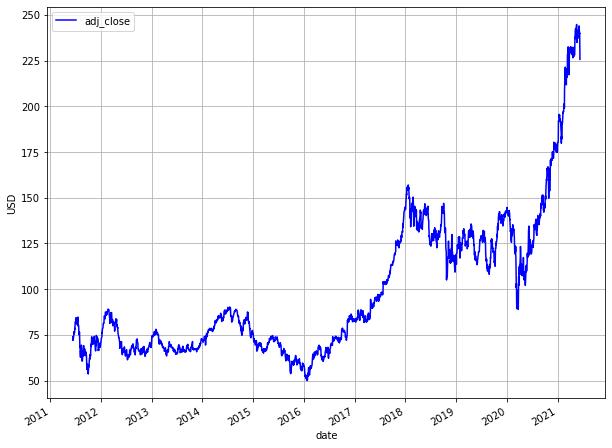

In [59]:

rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = df.plot(x='date', y='adj_close', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [60]:
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

train = df[:num_train]
cv = df[num_train:num_train+num_cv]
train_cv = df[:num_train+num_cv]
test = df[num_train+num_cv:]
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 1510
num_cv = 503
num_test = 503
train.shape = (1510, 8)
cv.shape = (503, 8)
train_cv.shape = (2013, 8)
test.shape = (503, 8)


Text(0, 0.5, 'USD')

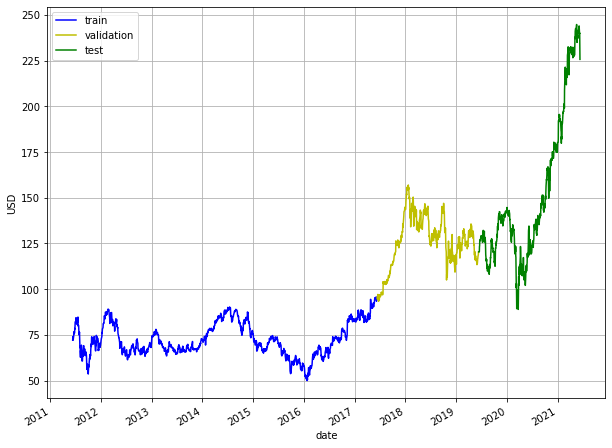

In [61]:

rcParams['figure.figsize'] = 10, 8 

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [62]:
RMSE = []
mape = []
for N in range(1, Nmax+1):
    est_list = get_preds_mov_avg(train_cv, 'adj_close', N, 0, num_train)
    
    cv.loc[:, 'est' + '_N' + str(N)] = est_list
    RMSE.append(math.sqrt(mean_squared_error(est_list, cv['adj_close'])))
    mape.append(get_mape(cv['adj_close'], est_list))
print('RMSE = ' + str(RMSE))
print('MAPE = ' + str(mape))
df.head()

RMSE = [2.2897799576771187, 2.57435472083556, 2.8459266824799294, 3.1330924502459445, 3.4108385121039566, 3.6549226810139697, 3.8716208390827123, 4.073581708742245, 4.271130330788292, 4.468967327700479, 4.664808021072576, 4.849077832147377, 5.024222858209398, 5.191079567999872, 5.343777295783695, 5.4848643428393276, 5.621043060981213, 5.7533740057938205, 5.884823934224714, 6.013358532204464, 6.136415167638992]
MAPE = [1.2798303633558237, 1.4556218247845938, 1.6174906834705616, 1.8128414067720957, 1.975564330690863, 2.1183398313365913, 2.2627537217468268, 2.393239636182037, 2.522439526210917, 2.6463924574615842, 2.776501451185413, 2.897508374501549, 3.005812762531391, 3.100153216786476, 3.18787891474053, 3.26990754633497, 3.346315648841549, 3.415657279739988, 3.4865990114537073, 3.5600331020419818, 3.6396338748105266]


,date,open,high,low,close,adj_close,volume,month
0,2011-06-13,96.930000,97.529999,94.720001,95.440002,72.157776,9767400,6
1,2011-06-14,96.849998,98.449997,96.129997,97.860001,73.987419,8479700,6
2,2011-06-15,96.580002,97.360001,95.510002,95.650002,72.316536,8143600,6
3,2011-06-16,95.389999,96.860001,94.209999,95.459999,72.172890,8886500,6
4,2011-06-17,96.459999,96.940002,95.309998,95.949997,72.543373,8314800,6


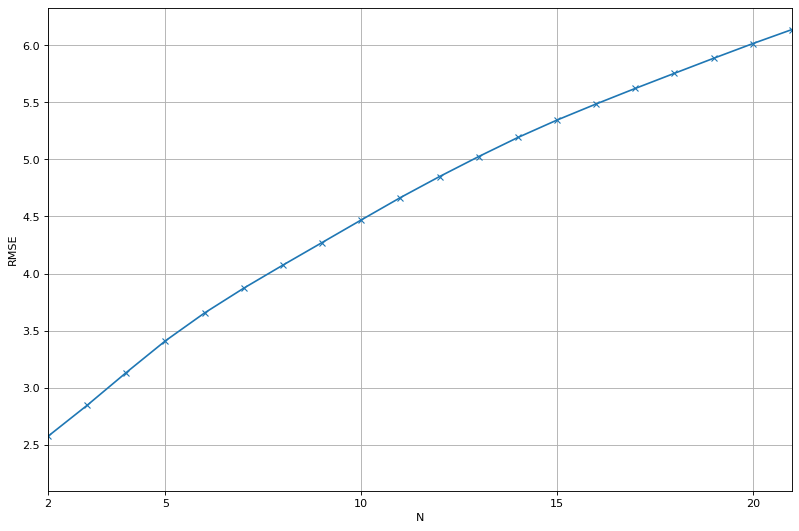

In [63]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([2, 21])
plt.xticks([2, 5, 10, 15, 20])
matplotlib.rcParams.update({'font.size': 14})

([<matplotlib.axis.XTick at 0xd9f26536d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

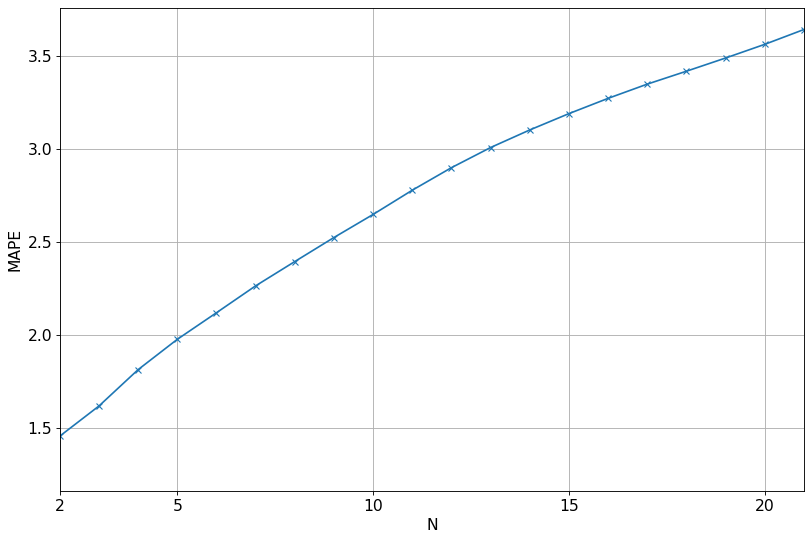

In [64]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), mape, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')
plt.xlim([2, 21])
plt.xticks([2, 5, 10, 15, 20])

In [65]:
N_opt = 2

Text(0, 0.5, 'USD')

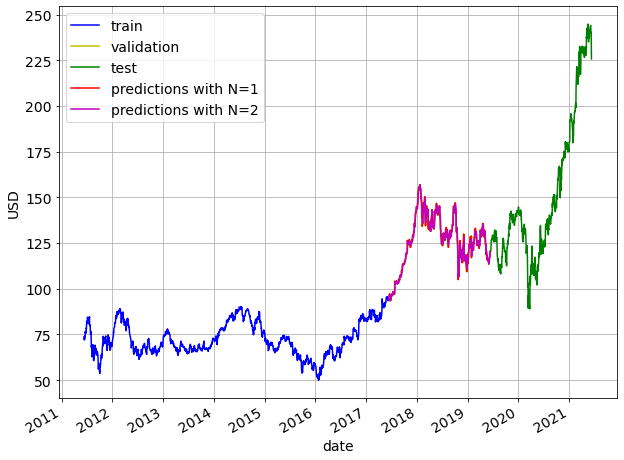

In [66]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='r-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N2', style='m-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test', 'predictions with N=1', 'predictions with N=2'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to dev set')

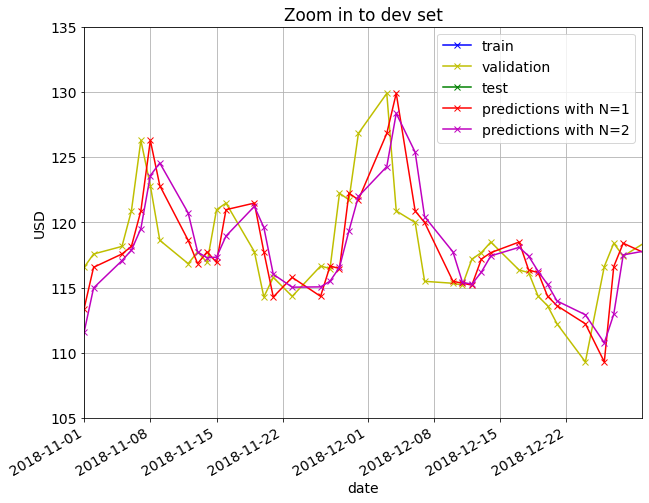

In [67]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='rx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N2', style='mx-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test', 'predictions with N=1', 'predictions with N=2'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2018, 11, 1), date(2018, 12, 30)])
ax.set_ylim([105,135])
ax.set_title('Zoom in to dev set')

In [68]:
est_list = get_preds_mov_avg(df, 'adj_close', N_opt, 0, num_train+num_cv)
test.loc[:, 'est' + '_N' + str(N_opt)] = est_list
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(est_list, test['adj_close'])))
print("MAPE = %0.3f%%" % get_mape(test['adj_close'], est_list))
test.head()

RMSE = 3.399
MAPE = 1.729%


,date,open,high,low,close,adj_close,volume,month,est_N2
2013,2019-06-13,127.349998,128.399994,126.760002,127.169998,120.365616,3495200,6,120.384541
2014,2019-06-14,126.610001,127.650002,125.500000,127.230003,120.422409,2530100,6,120.332489
2015,2019-06-17,127.209999,128.229996,126.680000,127.320000,120.507591,2607900,6,120.394013
2016,2019-06-18,128.399994,131.350006,128.210007,130.330002,123.356537,4756100,6,120.465000
2017,2019-06-19,130.320007,131.539993,129.869995,130.610001,123.621536,3847200,6,121.932064


Text(0, 0.5, 'USD')

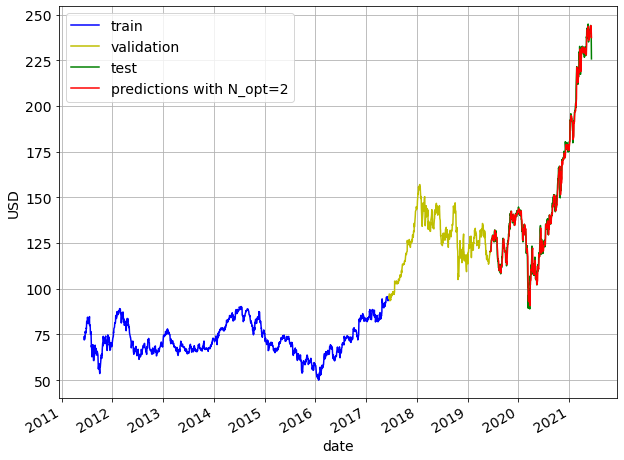

In [69]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N2', style='r-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test', 'predictions with N_opt=2'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to test set')

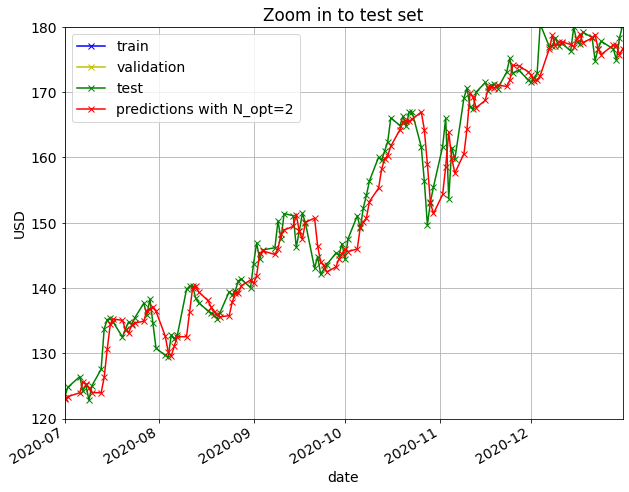

In [70]:
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N2', style='rx-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test', 'predictions with N_opt=2'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2020, 7, 1), date(2020, 12, 31)])
ax.set_ylim([120,180])
ax.set_title('Zoom in to test set')

(120.0, 180.0)

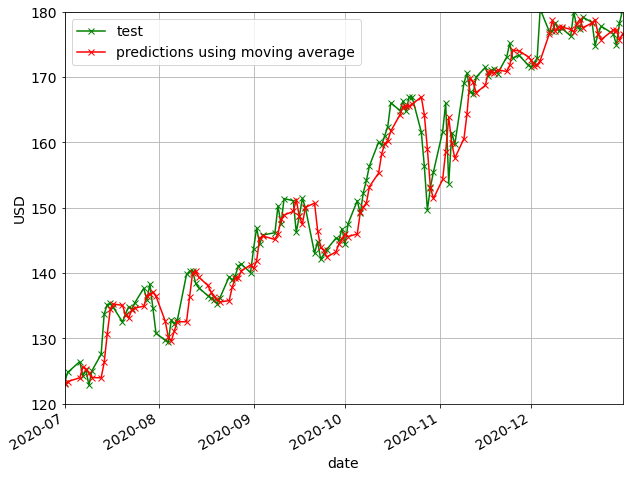

In [71]:
rcParams['figure.figsize'] = 10, 8
matplotlib.rcParams.update({'font.size': 14})

ax = test.plot(x='date', y='adj_close', style='gx-', grid=True)
ax = test.plot(x='date', y='est_N2', style='rx-', grid=True, ax=ax)
ax.legend(['test', 'predictions using moving average'], loc='upper left')
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2020, 7, 1), date(2020, 12, 31)])
ax.set_ylim([120,180])

In [72]:
test_moving_avg_CAT = test
test_moving_avg_CAT.to_csv("C:/Users/Parikshit Ghosh/Downloads/ML models/test_moving_avg_CAT.csv")